# Intro to Data Science from scratch

## Users and friendships

In [2]:
users = [ 
    {'id': 0, 'name': 'Hero'},
    {'id': 1, 'name': 'Dunn'},
    {'id': 2, 'name': 'Sue'},
    {'id': 3, 'name': 'John'},
    {'id': 4, 'name': 'Jane'},
    {'id': 5, 'name': 'Mike'},
    {'id': 6, 'name': 'Emily'},
    {'id': 7, 'name': 'Alex'},
    {'id': 8, 'name': 'Sarah'},
    {'id': 9, 'name': 'Tom'}
]

friendship_pairs = [(0,1), (1,2), (2, 6), (3,4), (7,1), (3, 9), (8, 6), (3,5), (4, 5), (5, 8), (6, 7), (7, 8), (8, 9),]

Lets transform the friendships pairs in values for the users key in a dict: 

In [3]:
friendships = {user['id']: [] for user in users}

for i, j in friendship_pairs :
    friendships[i].append(j)
    friendships[j].append(i)

Average connection number

In [4]:
def number_of_friendships(user):
    f"""How many friends does {user['name']} have?"""
    user_id = user['id']
    friend_ids = friendships[user_id]
    return len(friend_ids)

total_connections = sum(number_of_friendships(user) for user in users)

average_connections = total_connections/len(users)
average_connections

2.6

Find those with most friends

(using a list of tuples, (user id and number of friends))

In [5]:
num_friends_by_id = [(user['id'], number_of_friendships(user)) for user in users]

num_friends_by_id.sort(key=lambda id_and_friends: id_and_friends[1], reverse=True)
num_friends_by_id

[(8, 4),
 (1, 3),
 (3, 3),
 (5, 3),
 (6, 3),
 (7, 3),
 (2, 2),
 (4, 2),
 (9, 2),
 (0, 1)]

What we just saw was __*Degree Centrality (Centralidade de Grau)*__ used in Graph Teory and network

![Image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTWszs2JV6tcQll5zQSy-tkD0HQEMshZXdtg&s)

## Friend of a friend (Foaf)

In [6]:
def foaf_ids_bad(user):
    return [
        foaf_id
        for friends_id in friendships[user['id']]
        for foaf_id in friendships[friends_id]    
        ]

print (foaf_ids_bad(user=users[8]))
print(friendships[8])

[2, 8, 7, 3, 4, 8, 1, 6, 8, 3, 8]
[6, 5, 7, 9]


In [7]:
from collections import Counter

def friends_of_friends(user):
    user_id = user['id']
    return Counter(
        foaf_id
        for friend_id in friendships[user_id]
        for foaf_id in friendships[friend_id]
        if foaf_id != user_id
        and foaf_id not in friendships[user_id]
    )

friends_of_friends(user=users[8])

Counter({3: 2, 2: 1, 4: 1, 1: 1})

## User interests


In [8]:
interests = [
(0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
(0, "Spark"), (0, "Storm"), (0, "Cassandra"),
(1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
(1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
(2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
(3, "statistics"), (3, "regression"), (3, "probability"),
(4, "machine learning"), (4, "regression"), (4, "decision trees"),
(4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
(5, "Haskell"), (5, "programming languages"), (6, "statistics"),
(6, "probability"), (6, "mathematics"), (6, "theory"),
(7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
(7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
(8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
(9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [9]:
def scientists_who_like(target_interest):
    return [
        user_id
        for user_id, user_interest in interests
        if user_interest == target_interest
    ]

scientists_who_like('Python')

[2, 3, 5]

The sollutiion above will work, but it is not optimized for scaling. Lets continue working to make it better


In [16]:
from collections import defaultdict

user_ids_by_interest = defaultdict(list)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)

interests_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)

interests_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

In [18]:
user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

In [25]:
def most_common_interests_with(user):
    return Counter(
        interested_user_id
        for interest in interests_by_user_id[user['id']]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user['id']
    )

most_common_interests_with(user=users[8])

Counter({7: 1, 0: 1, 9: 1})

## Salaries and Expericence

In [26]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
(48000, 0.7), (76000, 6),
(69000, 6.5), (76000, 7.5),
(60000, 2.5), (83000, 10),
(48000, 1.9), (63000, 4.2)]

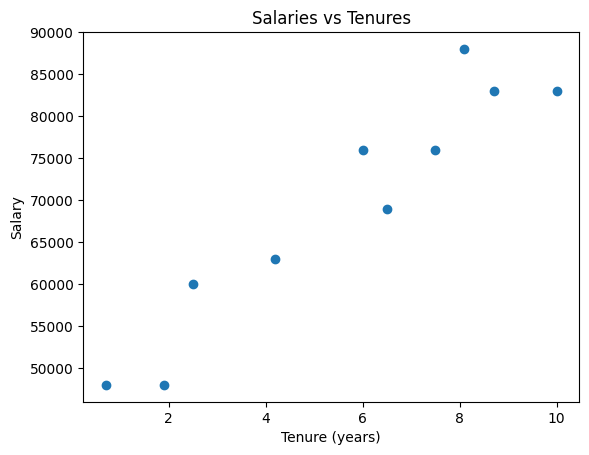

In [41]:
import matplotlib.pyplot as plt

years = [item[1] for item in salaries_and_tenures]
salaries = [item[0] for item in salaries_and_tenures]


plt.scatter(years, salaries)
plt.xlabel('Tenure (years)')
plt.ylabel('Salary')
plt.title('Salaries vs Tenures')

plt.show()

In [ ]:
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

salary_by_tenure

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10: [83000],
             1.9: [48000],
             4.2: [63000]})

In [ ]:
average_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

Because the employees don't have equal tenures, the information above seems to be "useless", it will show their individual salaries.

Maybe it is better to group experience years in buckets

In [ ]:
def tenure_bucket(tenure):
    if tenure < 2:
        return 'less than two'
    elif tenure < 5:
        return 'between two and five'
    else:
        return 'more than five'

In [ ]:
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

In [ ]:
average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

## Paid costs

<br> 0.7 paid 
<br> 1.9 unpaid
<br> 2.5 paid
<br> 4.2 unpaid
<br> 6.0 unpaid
<br> 6.5 unpaid
<br> 7.5 unpaid
<br> 8.1 unpaid
<br> 8.7 paid
<br> 10.0 paid

predict paid and unpaid for "users"

In [45]:
def predict_paid_or_unpaid(years_experience):
    if years_experience < 3.0 or years_experience  > 8.5:
        return 'paid'
    else:
        return 'unpaid'

# Function based on raw interpratation of data. Prediction models are great for this use case

## Interest topics

In [53]:
interests = [
(0, 'Hadoop'), (0, 'Big Data'), (0, 'HBase'), (0, 'Java'),
(0, 'Spark'), (0, 'Storm'), (0, 'Cassandra'),
(1, 'NoSQL'), (1, 'MongoDB'), (1, 'Cassandra'), (1, 'HBase'),
(1, 'Postgres'), (2, 'Python'), (2, 'scikit-learn'), (2, 'scipy'),
(2, 'numpy'), (2, 'statsmodels'), (2, 'pandas'), (3, 'R'), (3, 'Python'),
(3, 'statistics'), (3, 'regression'), (3, 'probability'),
(4, 'machine learning'), (4, 'regression'), (4, 'decision trees'),
(4, 'libsvm'), (5, 'Python'), (5, 'R'), (5, 'Java'), (5, 'C++'),
(5, 'Haskell'), (5, 'programming languages'), (6, 'statistics'),
(6, 'probability'), (6, 'mathematics'), (6, 'theory'),
(7, 'machine learning'), (7, 'scikit-learn'), (7, 'Mahout'),
(7, 'neural networks'), (8, 'neural networks'), (8, 'deep learning'),
(8, 'Big Data'), (8, 'artificial intelligence'), (9, 'Hadoop'),
(9, 'Java'), (9, 'MapReduce'), (9, 'Big Data')
]

In [55]:
# simple (perhaps boring) way of finding most popular interests is counting words

words_and_counts = Counter(
    word for user, interest in interests
    for word in interest.lower().split()
)

for word, count in words_and_counts.most_common(): 
    if count > 1: 
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
